In [1]:
import gffutils
import pybedtools
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
db = gffutils.FeatureDB('/Volumes/Promise_Pegasus/LCDB/lcdb-references/dmel/r6-11/gtf/dmel_r6-11.gtf.db')

/Users/bergeric/miniconda3/lib/python3.5/site-packages/gffutils/interface.py:161: UserWarning: It appears that this database has not had the ANALYZE sqlite3 command run on it. Doing so can dramatically speed up queries, and is done by default for databases created with gffutils >0.8.7.1 (this database was created with version 0.8.7.1) Consider calling the analyze() method of this object.
  "method of this object." % self.version)


In [3]:
for a in db.featuretypes():
    print(a)

3UTR
5UTR
CDS
exon
gene
mRNA
miRNA
ncRNA
pre_miRNA
pseudogene
rRNA
snRNA
snoRNA
start_codon
stop_codon
tRNA
transcript


In [4]:
for y in db.features_of_type('gene'):
    print(y)
    break

chrX	FlyBase	gene	19961297	19969323	.	+	.	gene_id "FBgn0031081"; gene_symbol "Nep3";


In [5]:
#number of transcripts per gene
table1 = []
for gene in db.features_of_type('gene'): 
    name = gene.id
    transcript = db.children(gene, featuretype='transcript')
    transcriptnum = len(list(transcript))
    row = [name, transcriptnum]
    table1.append(row)
    

In [6]:
df1 = pd.DataFrame(table1, columns=['gene','#transcripts'])
df1.head()

,gene,#transcripts
0,FBgn0031081,3
1,FBgn0052826,1
2,FBgn0031085,1
3,FBgn0062565,1
4,FBgn0031088,2


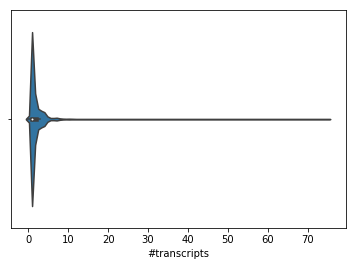

In [7]:
sb.violinplot(df1['#transcripts'])

In [8]:
newdf = df1.describe()

In [9]:
introns = list(db.create_introns(exon_featuretype='exon',grandparent_featuretype=None,parent_featuretype='transcript'))
for a in db.featuretypes():
    print(a)

3UTR
5UTR
CDS
exon
gene
mRNA
miRNA
ncRNA
pre_miRNA
pseudogene
rRNA
snRNA
snoRNA
start_codon
stop_codon
tRNA
transcript


In [10]:
for x in db.features_of_type('mRNA'):
    print(x)
    break

chrX	FlyBase	mRNA	19961689	19968479	15	+	.	transcript_symbol "Nep3-RA"; transcript_id "FBtr0070000"; gene_id "FBgn0031081"; gene_symbol "Nep3";


In [11]:
for x in db.features_of_type('transcript'): 
    if x.id=='FBtr0070000':
        print(x)

chrX	gffutils_derived	transcript	19961689	19968479	.	+	.	transcript_id "FBtr0070000"; gene_id "FBgn0031081";


In [12]:
x.id

'FBtr0301831'

In [13]:
table = []
flag = False
for trns in db.features_of_type('transcript'):
    name = trns.id
    exons = list(db.children(trns, featuretype='exon'))
  
    #ints = list(db.children(trns, featuretype='intron'))
    # length of 1st exon for each transcript
    firstex = exons[0]
    exlen = firstex.end - firstex.start
    # number of introns/exons
    numex = len(exons)
    numin = (numex - 1)
    stuff = [name, exlen, numex, numin]
    table.append(stuff) 

In [14]:
df = pd.DataFrame(table, columns=['transcript','1st_ex_len','#ex','#int'])
df.head()

,transcript,1st_ex_len,#ex,#int
0,FBtr0081624,298,1,0
1,FBtr0071763,240,10,9
2,FBtr0071764,818,9,8
3,FBtr0100521,58,10,9
4,FBtr0342981,58,9,8


In [ ]:
tlist = df['transcript']

In [ ]:
# length of coding sequence 
table2 = []
cdslen = 0
for x in tlist:
    if list(db.children(x, featuretype='CDS')): 
        for i in db.children(x, featuretype='CDS'):
            len1 = (len(i) - 1 )
            cdslen += len1
    else:     
        cdslen = 0
    
    newline = [x, cdslen]
    table2.append(newline)

In [ ]:
# length of utrs using transcript
table3 = []
utrlen = 0
for x in tlist: 
    if list(db.children(x, featuretype='3UTR')):
        for utr in db.children(x, featuretype='3UTR'):
            len2 = len(utr) - 1 
            utrlen += len2
    else:
        utrlen = 0
    newline = [x, utrlen]
    table3.append(newline)

In [ ]:
table4 = []
utrlen = 0
for x in tlist: 
    if list(db.children(x, featuretype='5UTR')):
        for utr in db.children(x, featuretype='5UTR'):
            len2 = len(utr) - 1 
            utrlen += len2
    else:
        utrlen = 0
    newline = [x, utrlen]
    table4.append(newline)

In [ ]:
#mrna utrs
table4 = []
utrln=0
for x in db.features_of_type('mRNA'):
    for utr in db.region(x, featuretype='3UTR'):
        ln = len(utr) - 1
        utrln += ln
    newline = [x, utrln]
    table4.append(newline)
        

In [ ]:
utr3frame = pd.DataFrame(table3, columns=['transcript','3UTR_len'])
utr5frame = pd.DataFrame(table4, columns=['transcript','5UTR_len'])
utr3frame.head()

In [ ]:
df3 = pd.DataFrame(table2, columns=['transcript','cds_len'])
df3

In [ ]:
df3['cds_len'].sort_values()

In [ ]:
bigdf = df.merge(df3, how='left', on='transcript').merge(utr3frame, how='left', on='transcript').merge(utr5frame,how='left', on='transcript')
bigdf.head()

In [ ]:
pd.concat([bigdf.describe(), newdf], axis=1)